In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df0 = pd.read_csv("data/results_predict_all_0.0.txt", sep="\t")
df3 = pd.read_csv("data/results_predict_all_0.003.txt", sep="\t")
df6 = pd.read_csv("data/results_predict_all_0.006.txt", sep="\t")
df9 = pd.read_csv("data/results_predict_all_0.009.txt", sep="\t")
df12 = pd.read_csv("data/results_predict_all_0.012.txt", sep="\t")

df = pd.concat((df0, df3, df6, df9, df12), ignore_index=True)


In [5]:
df

,scene_id,sigma,col,noise_norm,ade,fde
0,0,0.000,0,0.000000,0.148012,0.556868
1,1,0.000,0,0.000000,0.172690,0.702438
2,2,0.000,0,0.000000,0.179348,0.688300
3,3,0.000,0,0.000000,0.270700,1.023600
4,3,0.000,0,0.000000,0.142971,0.505934
...,...,...,...,...,...,...
6155,1760,0.012,0,0.008410,0.102472,0.271214
6156,1761,0.012,0,0.008028,0.091920,0.220595
6157,1763,0.012,0,0.006147,0.284563,1.224748
6158,1764,0.012,0,0.010127,0.246510,0.977304


In [6]:
df[df["col"] != 0]

,scene_id,sigma,col,noise_norm,ade,fde
246,162,0.000,1,0.000000,0.559761,2.412341
513,386,0.000,1,0.000000,0.202754,0.393887
519,389,0.000,1,0.000000,0.142802,0.303282
779,780,0.000,1,0.000000,0.291207,1.239086
789,807,0.000,1,0.000000,0.146196,0.462035
800,828,0.000,1,0.000000,0.364561,1.597258
821,858,0.000,1,0.000000,0.724655,2.649855
846,884,0.000,1,0.000000,0.804218,3.075626
852,892,0.000,1,0.000000,0.551170,2.382031
907,1003,0.000,1,0.000000,0.310822,1.834117


In [7]:
df[df["col"]==-2]

,scene_id,sigma,col,noise_norm,ade,fde


In [8]:
df_mean = df.groupby("sigma")[["col", "fde", "ade"]].mean()
df_mean

,col,fde,ade
sigma,,,
0.000,0.012175,1.167052,0.305941
0.003,0.002435,1.167219,0.306522
0.006,0.000812,1.171378,0.308428
0.009,0.000812,1.180080,0.311575
0.012,0.000000,1.181798,0.313238


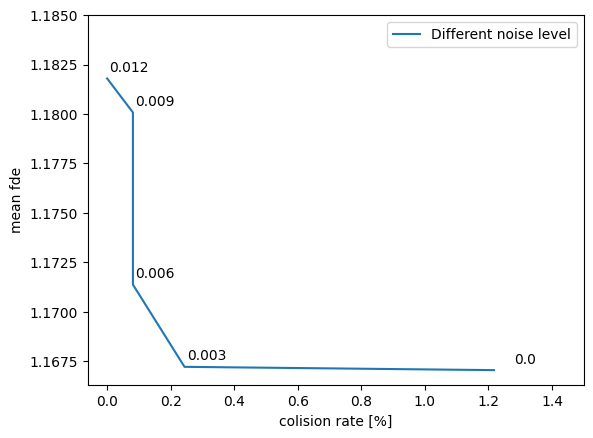

In [12]:
x = df_mean["col"]*100
y = df_mean["fde"]
plt.plot(x, y, label="Different noise level")
plt.ylabel("mean fde")
plt.xlabel("colision rate [%]")

plt.ylim(top = 1.185)
plt.xlim(right = 1.5)

#plt.axvline(0, color = "k")

plt.legend()



for i, (x,y) in enumerate(zip(x,y)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')

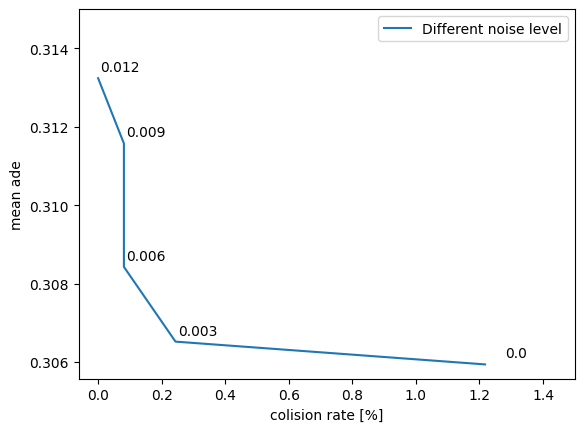

In [13]:
x = df_mean["col"]*100
y = df_mean["ade"]
plt.plot(x, y, label="Different noise level")
plt.ylabel("mean ade")
plt.xlabel("colision rate [%]")

plt.ylim(top = 0.315)
plt.xlim(right = 1.5)

#plt.axvline(0, color = "k")

plt.legend()

for i, (x,y) in enumerate(zip(x,y)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')

In [7]:
#test
import torch
from scipy.stats import norm

T = 3
n = 4
d = 2
x = torch.empty((T,n,d)).normal_()
l = torch.empty((T,n,d)).normal_() - 10
u = torch.empty((T,n,d)).normal_() + 10

bounds = torch.stack((l, u), dim=0)

r = (x - l)/(u-l)

norm.ppf(r)

print(bounds)

tensor([[[[ -8.8133,  -9.6062],
          [-12.5309, -10.4273],
          [-10.2230,  -9.2288],
          [-10.4177,  -6.6917]],

         [[-11.1831, -10.2459],
          [ -9.6548, -12.0239],
          [ -9.5672,  -9.9022],
          [-10.6598, -10.8476]],

         [[ -9.9031,  -9.0937],
          [-10.1967, -10.4047],
          [-10.9071,  -9.8852],
          [ -8.5420, -10.5376]]],


        [[[  8.0803,  11.3902],
          [  9.5491,  11.0565],
          [ 11.2312,   8.9142],
          [  7.9535,   7.9759]],

         [[  9.7859,  12.4904],
          [ 10.8170,  12.0228],
          [  9.1454,  11.8719],
          [  9.1591,   9.1168]],

         [[  9.0919,  10.9204],
          [ 10.3040,  10.2241],
          [ 10.4912,   9.5718],
          [  9.8931,  11.0202]]]])
